In [22]:
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D
def graph_vis(G, node_loc, streamlines):
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#bfbfbf', lw = 2);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]*5
        if wt == 10:
            ax.plot(*vizedge.T, color='g',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        else:
            ax.plot(*vizedge.T, color='#000000',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")
    plt.legend()
#read streamlines and create combined_streamlines
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = sub_list[:3]
# sub_list = ['', '1808u', '1043f', '0001a', '4662a', '1142k', '', '2027j', '3978i', '1145h', '3058s', '2211h', '', '', '0798q', '3571z', '4680i', '3832y', '1853b', '', '0097p', '', '', '']

In [ ]:
# loi = [0,4,9,12,19,20]
loi=[9,12,13,15,23,24]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  not in loi]
sub_list = sub_list1
print(sub_list)

In [ ]:
loi=[0,7,8,9,10,11,14]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  in loi]
sub_list = sub_list1


In [ ]:
sub_list = sub_list1[1:]
print(sub_list)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==80]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
path = "/media/hdd2/shailja/Crash/IFOFsphere1brush6/"
file_list = os.listdir(path)
dic = {}
for file in file_list:
    dic[file.split("_")[0][4:]] = True
print(dic.keys())
    
    

In [23]:
%%time
import netrd
import siminetInsertDelCost as sn
from functools import partial

def annotate_graph(graph, node_positions):
    for e in graph.edges:
        n1, n2 = e
        pos1, pos2 = np.array(node_positions[n1]), np.array(node_positions[n2])
        graph.nodes[n1]["position"] = pos1
        graph.nodes[n2]["position"] = pos2
        graph.edges[e]["distance"] = np.linalg.norm(pos1 - pos2)
        
def merge_equivalent(graph, node_annotations):
    """
    Intakes a graph and its associated node annotations where some nodes may have the same annotation (spatial position). 
    Those equivalent nodes will be merged into the same node, and edges involving these equivalent nodes will be inherited 
    by the final node.
    """
    
    equivalences = dict()
    
    for pos, node in node_annotations.items():
        if pos not in equivalences:
            equivalences[pos] = []
        
        equivalences[pos].append(node)
        
    for eq_group in equivalences.values():
        if len(eq_group) == 1: # nothing to merge
            continue
            
        head, tail = eq_group[0], eq_group[1:]
        for n in tail:
            nx.contracted_nodes(graph, head, n, copy=False)

CPU times: user 35 µs, sys: 13 µs, total: 48 µs
Wall time: 58.4 µs


In [39]:
#tau = 5
#importance of node score
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = [sub_list[i] for i in range(len(sub_list)) if i not in del_list_]
# sub_list =['4917f', '3571z', '1665h', '3832y', '0097p','4680i']
sub_list = [sub_list[i] for i in [ 0,1,7, 24,15,18]]
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes())
#     return node_score/(4*eps*max(len(gref.nodes()),len(gcmp.nodes())))# throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 5
dist_hm = []
del_list = []
inter_dist = []
intra_dist = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        H1 =nx.read_gpickle("/media/hdd2/shailja/Crash/CC_ref/H_CC_ref_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CC_ref/node_loc_CC_ref_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H1, node_loc_all)
                        annotate_graph(H1, node_loc_all)
                        node_list = H1.nodes()
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
    #                         print(node_list)
    #                         print(node_loc.keys())
    #                         node_loc =[node for node in node_list if node in node_loc.values()]
                        x_c1 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c1 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c1 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        H2 =nx.read_gpickle("/media/hdd2/shailja/Crash/CC_ref/H_CC_ref_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CC_ref/node_loc_CC_ref_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H2, node_loc_all)
                        annotate_graph(H2, node_loc_all)
                        node_list = H2.nodes()
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
                        x_c2 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c2 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c2 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        sub_r = np.linalg.norm(np.array([x_c1,y_c1,z_c1]) - np.array([x_c2,y_c2,z_c2]))
                        print(sub_r)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn,ins_cost = 2*eps*(1+sub_r/10))
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        
                        if dist>25:
                            dist_sub.append(25)
                        else:
                            dist_sub.append(dist)

                        if (subj == subi):
                            intra_dist.append(dist)
                            print(subi,i,subj,j,dist)
                        else:
                            inter_dist.append(dist)
                    except:
                        print(subi,subj,i,j)
            dist_hm.append(dist_sub)

    

    

0.0
0 1 0 1 0.0
1.07764527829752
0 1 0 2 5.926904568660756
9.376745604462732
0 1 0 3 10.449231154507522
2.5308186306786267
0 1 0 4 9.556810991812116
2.228554085167063
0 1 0 5 6.702121865928316
2.611785473357959
0 1 0 6 6.885238651721924
2.1475555590550015
0 1 0 7 8.76060218153476
3.743692639713427
0 1 0 8 6.476435804562733
0 0 1 9
6.458026651378331
3.021172773217976
7.2309166398893545
9.486996485154005
5.840898253515443
9.44069624795424
7.879143625192415
1.5739547999783479
0 1 1 9
0 2 1 1
2.207699065577053
5.129442415069417
5.0920804354694305
8.945131025218501
6.004068414838831
1.9867229684478012
11.210871666807922
5.125824154059914
12.079688555855668
10.463514141066078
12.548960129132501
10.453462761340385
14.2015360049797
12.946096472237484
7.312427354853442
8.025958021515798
0 3 1 9
8.723074434028538
9.81684235183364
7.829537687481078
5.658932357339914
14.898435669785089
8.649122863602067
8.53544696651244
10.247233708196767
0 4 1 9
8.122217892616163
9.505711804246205
6.1534647309442

6.939399767807175
14.146827600254882
11.05219821223667
10.521324527130933
11.393181902404773
0 4 8 9
4.943411244423154
7.490167417773744
4.573310873243268
4.323612261491579
6.493314253062839
7.067144290296343
4.0750521629902074
7.2199048714355145
0 5 8 9
0 0 9 1
0 0 9 2
0 0 9 3
0 0 9 4
0 0 9 5
0 0 9 6
0 0 9 7
0 0 9 8
0 0 9 9
0 1 9 1
0 1 9 2
0 1 9 3
0 1 9 4
0 1 9 5
0 1 9 6
0 1 9 7
0 1 9 8
0 1 9 9
0 2 9 1
0 2 9 2
0 2 9 3
0 2 9 4
0 2 9 5
0 2 9 6
0 2 9 7
0 2 9 8
0 2 9 9
0 3 9 1
0 3 9 2
0 3 9 3
0 3 9 4
0 3 9 5
0 3 9 6
0 3 9 7
0 3 9 8
0 3 9 9
0 4 9 1
0 4 9 2
0 4 9 3
0 4 9 4
0 4 9 5
0 4 9 6
0 4 9 7
0 4 9 8
0 4 9 9
0 5 9 1
0 5 9 2
0 5 9 3
0 5 9 4
0 5 9 5
0 5 9 6
0 5 9 7
0 5 9 8
0 5 9 9
6.458026651378331
6.681239935908215
14.447237882300918
5.668904977349328
8.258694364703787
8.288351282272396
6.722352642049934
5.010578049750916
1 0 1 9
0.0
1 1 1 1 0.0
4.872780753376194
1 1 1 2 8.967260981378143
1.246327984463229
1 1 1 3 6.983739974018558
3.687102000446524
1 1 1 4 6.926864969658479
1.0585198120

5.692321284349809
2.7438020722757512
9.832251644261026
4.168793994481776
12.426140275895342
11.457575475076851
12.872289287071156
11.40772739177387
14.486233006025053
13.12065899864464
8.100010013349149
8.470113774742218
1 3 8 9
8.40644540374289
10.68307705354674
9.370251587460311
6.556524138001115
16.266182821819502
7.6203847473828406
8.886444619084562
11.062769054604308
1 4 8 9
8.57078780636627
9.634595383446076
6.1598515853617695
6.113291380908242
9.590799304147168
5.478998846743489
8.11807767317872
8.36949995299532
1 5 8 9
1 0 9 1
1 0 9 2
1 0 9 3
1 0 9 4
1 0 9 5
1 0 9 6
1 0 9 7
1 0 9 8
1 0 9 9
1 1 9 1
1 1 9 2
1 1 9 3
1 1 9 4
1 1 9 5
1 1 9 6
1 1 9 7
1 1 9 8
1 1 9 9
1 2 9 1
1 2 9 2
1 2 9 3
1 2 9 4
1 2 9 5
1 2 9 6
1 2 9 7
1 2 9 8
1 2 9 9
1 3 9 1
1 3 9 2
1 3 9 3
1 3 9 4
1 3 9 5
1 3 9 6
1 3 9 7
1 3 9 8
1 3 9 9
1 4 9 1
1 4 9 2
1 4 9 3
1 4 9 4
1 4 9 5
1 4 9 6
1 4 9 7
1 4 9 8
1 4 9 9
1 5 9 1
1 5 9 2
1 5 9 3
1 5 9 4
1 5 9 5
1 5 9 6
1 5 9 7
1 5 9 8
1 5 9 9
2 0 1 1
2 0 1 2
2 0 1 3
2 0 1 4
2 0

2 8 2 8 0.0
6.547280340315442
2 8 2 9 8.780140128030707
20.733160396770185
20.645492861469137
21.05731263671862
20.63795998705926
22.497350184972
20.91032093657099
15.692144550260318
17.23697287566553
2 3 8 9
8.61335316354991
15.59422796922295
18.1815001639732
13.181514536153255
23.568543842557226
5.760871439373887
12.19639649733376
15.805285629132781
2 4 8 9
17.407322075356113
17.61488271022358
14.485556345484559
13.654709544759035
17.80662423677041
10.880292388581111
16.9716588710611
15.055956299851516
2 5 8 9
5.125824154059914
4.663726339894523
10.306649252980662
7.098664568869621
5.008756617884561
3.595786520090275
6.6981508651563315
8.589238128115609
2 0 9 9
10.796235344189656
6.025602059185446
11.221495636064734
14.234518319189377
10.466094283055789
13.621989143594794
12.658865863395063
4.168793994481776
2 1 9 9
2 2 9 1
5.490079586663784
2 9 2 2 8.7125090735436
1.1799352618816956
2 9 2 3 6.542816133859253
5.868946965558329
2 9 2 4 9.138284948116386
10.768460813803436
2 9 2 5 11.7

3 1 7 9
3 2 7 1
7.832137424963723
10.100579239823034
11.561252876967485
8.011422937519857
8.886460661049611
8.120806974569296
15.692144550260318
10.286248428768175
12.536743340914985
3 7 3 1 12.952650991555656
7.062495188517172
3 7 3 2 13.442876006263155
12.538325144124185
3 7 3 3 18.659817687052143
7.566847561923889
3 7 3 4 9.839825205824546
15.201813944909883
3 7 3 5 13.471322536144559
13.96526480099683
3 7 3 6 16.405126630674097
0.0
3 7 3 7 0.0
8.31915362028317
3 7 3 8 11.98685305421881
3 3 7 9
10.436092937306247
8.647144112664897
7.004068662958722
5.457895072315106
11.020289230470334
10.7344927748298
8.286110830962926
8.32185949504968
3 4 7 9
9.12760033388928
12.588595776008729
9.853437573240349
2.6606505500459883
10.557195306150682
11.526804960480158
7.3159507677136295
11.671642785836989
3 5 7 9
8.025958021515798
7.9903081243269405
12.923375163265076
5.810415188818712
8.764633314752778
9.132112579825327
7.1018400254477365
4.663908612155046
3 0 8 9
4.78550764343084
7.33206776246847

10.309258760806502
5.760871439373887
4.938648677112357
18.41165074040988
16.624360556394613
18.584433465411575
16.785413509600488
20.642330859066373
19.00012377927062
10.7344927748298
14.341465563577367
4 3 6 9
4.86784943561643
4 6 4 1 9.872360206360156
11.373020000280103
4 6 4 2 16.269183549894233
14.444230769039187
4 6 4 3 19.017732014363432
8.877279373562518
4 6 4 4 11.782702655847617
18.956575488982757
4 6 4 5 18.546977476288635
0.0
4 6 4 6 0.0
7.761872781950974
4 6 4 7 10.885990536401746
11.288776577073838
4 6 4 8 15.018518391431071
4 4 6 9
14.805005116086628
16.25436585774168
12.752898208507771
9.049598782522999
15.517736402454128
10.355883662405407
13.791920034045932
13.678541534424228
4 5 6 9
8.53544696651244
8.563200959852077
5.051865820513405
9.470853504170213
6.627489168545382
7.52988111275757
8.222153852105048
10.521324527130933
4 0 7 9
14.812768186804883
11.20554155455638
15.650713258352747
17.28535231376624
14.026615470659639
17.796178710731052
15.755241940390267
8.886444

19.218948712013823
15.517736402454128
16.801487529894075
17.72352167158378
5 4 5 9
1.821337120413799
5 5 5 1 5.83814551807506
3.1982546225651793
5 5 5 2 7.692261748080076
3.908851623648401
5 5 5 3 10.363401728374622
9.05641463100061
5 5 5 4 14.994451155887797
0.0
5 5 5 5 0.0
7.4705457907124435
5 5 5 6 13.544776102048658
3.311046288672524
5 5 5 7 5.930180321304788
3.735872621738922
5 5 5 8 7.25216251720558
5 5 5 9
6.507235898830582
5.890700546738477
14.474436108250673
6.4586967663908235
7.995761631757105
6.5464443270418196
7.717545048546967
7.067144290296343
5 0 6 9
5.687203890551497
3.6222737389418844
5.171153546796815
9.039760347412006
6.0995641828836495
7.820205648253126
8.185207544802084
5.478998846743489
5 1 6 9
5 2 6 1
8.507376482821925
9.030993755651819
3.0071188836568585
15.404379917522794
10.512035266867041
5.719626073386961
10.880292388581111
8.159675918761753
10.235153029290391
12.668302368520056
10.678843316726535
12.30866232367616
11.70503254286054
10.193919275011245
11.526

48


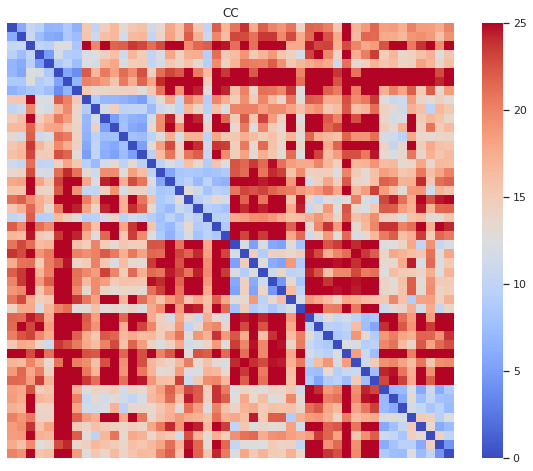

In [40]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc_ref6subhm.svg')


In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc_ref6subhm.svg')


In [ ]:
# print(len(inter_dist[:1585]), len(intra_dist))
import scipy.stats as stats
stats.ttest_ind(a=inter_dist,b=intra_dist,equal_var=False)

200


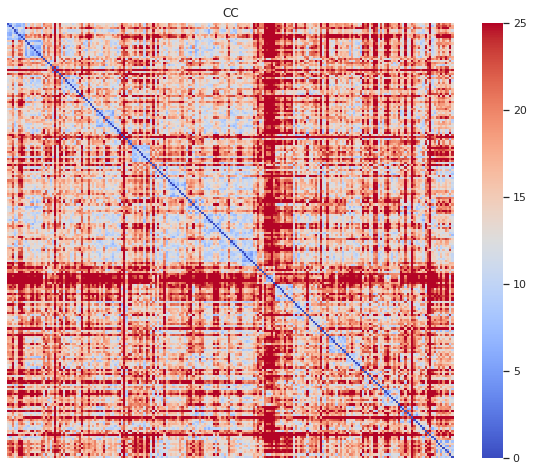

In [34]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc_ref25_17.5_subhm.svg')


200


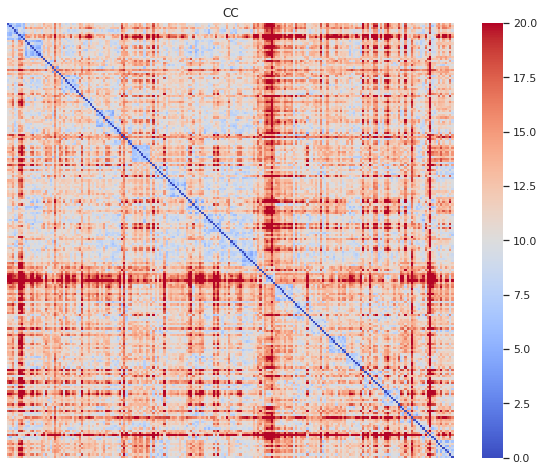

In [13]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc_ref25_17.5_subhm.svg')


In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==127
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist)
plt.savefig('cc16subhm.svg')

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==128]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==152]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.savefig('cc6subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==120]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "icefire")

In [ ]:
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# li = set(del_list)
# print(li)
li =  [3,5,6,14,19,21,22]
sub_list = [sub_list[i] for i in range(25) if i not in li]
print(sub_list)
# 2,3,4,5,6,8,9,12
sub_list = [ '2027j', '3978i', '3058s', '1145h', '4917f', '4961a']

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))

import seaborn as sns
# sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(dist,cmap = "viridis")


In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(8,8)})
dist = [i for i in dist_hm[:6] if len(i)==88]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes()) # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

    

    

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist,cmap = "coolwarm")

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)